In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
df=pd.read_csv("/content/sample_data/Mall_Customers.csv")
print(df.tail(10))
df.describe()

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
190         191  Female   34                 103                      23
191         192  Female   32                 103                      69
192         193    Male   33                 113                       8
193         194  Female   38                 113                      91
194         195  Female   47                 120                      16
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
X=df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler();
X_scaled = scaler.fit_transform(X)

In [ ]:
inertias=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


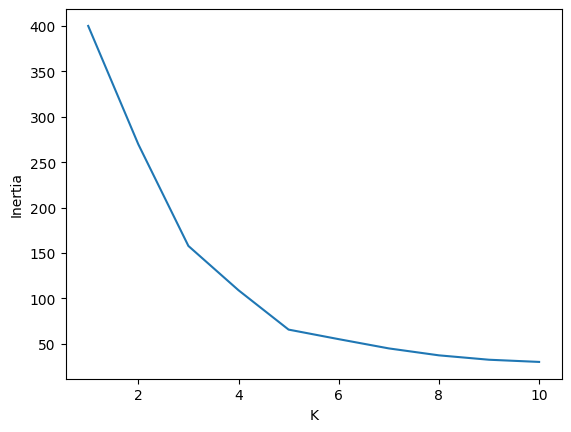

In [ ]:
plt.plot(range(1,11), inertias)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(X_scaled)
labels=kmeans.labels_
df['Cluster']= labels

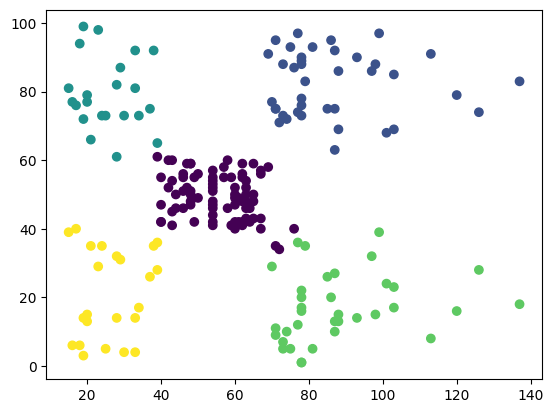

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,23.090909,25.272727,25.727273,79.363636
3,164.371429,41.114286,88.200000,17.114286
4,23.000000,45.217391,26.304348,20.913043


In [ ]:
score = silhouette_score(X_scaled, labels)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels);
plt.show()
df.groupby('Cluster').mean(numeric_only=True)
